<div align=center>
		
<font size=5>
In the Name of God
<font/>
<p></p>
<br/>
<br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mahdieh Soleimani
</font>
<br/>
<br/>
Fall 2022

<hr/>
<font color=red>
Optimization Practical Assignment (20 points)
</font>
</div>

<ul>
  <li>Some cell's outputs have not been deleted. you can use these to make sure your implementation is correct.</li>
</ul>

In this notebook you will learn to implement gradient descent algorithm. we will use 3 functions and run gradient descent on each and try to visualise the algorithm with different learning rates.

In [5]:
'''
# do not import other packages for this assignment
import numpy as np
from matplotlib import pyplot as plt

# 1-implement functions and their derivative

the three functions we are going to use are as follow:

a)
$f_1(x) = x\sin(\frac{\pi x}{40}) - \frac{x}{500} \quad $ where $\quad x \in [35, 80]$
<br/>
b)
$f_2(x) = \sin^2(\frac{\pi x}{50}) + \cos(\frac{\pi x}{50} - 2) \quad $ where $\quad x \in [5, 50]$
<br/>
c)
$f_3(x) = x\sin(x) \quad $ where $\quad x \in [400, 1500]$

use the numpy library mathematic function in order to make the functions vectorized.

In [3]:
# 3 points
def f1(x):
    return x * np.sin((x * np.pi)/40) - x/500

def f2(x):
    return (np.sin((x * np.pi)/50)) ** 2 + np.cos((x * np.pi)/50 - 2)

def f3(x):
    return x * np.sin(x/30)
    # we can assume x.sin(x) or x.sin(x/30) -- related question is on quera

run the code block below to plot the three functions.

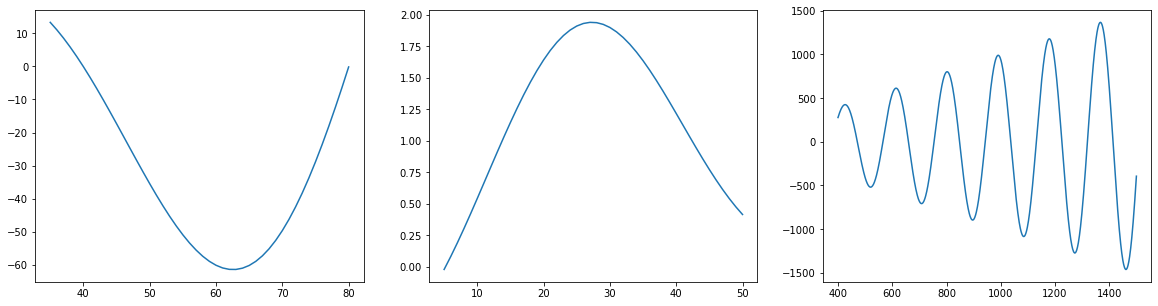

In [4]:
f1_range = np.arange(35, 81)
f2_range = np.arange(5, 51)
f3_range = np.arange(400, 1501)

fig, axs = plt.subplots(1,3,figsize=(20, 5))
axs[0].plot(f1_range, f1(f1_range))
axs[1].plot(f2_range, f2(f2_range))
axs[2].plot(f3_range, f3(f3_range))

write your answer to these questions on the next cell.  
Q1) which of these functions are convex or concave?  
Q2) can gradient descent be used to find the maximum of the second function?

<font color=red>
(4 points)    
<br/>
Q1 - your answer here 
<br/>
first: convex
<br/>
second: concave
<br/>
third: none
<br/>

Q2 - your answer here 
<br/> 
No. Because it should be convex.
</font>

# 2-implement gradient descent

complete the code below to implement gradient descent. in order to implement gradient descent you need to compute the derivatives. However, you dont have to compute the exact derivative terms and can instead use the numerical formula below to approximate it.

\begin{align}
    f'(x)\approx\frac{f(x+h)-f(x-h)}{2h}
\end{align}    

In [6]:
'''
محمدجواد ماهرالنقش
99105691
'''

# 5 points
def gradient_descent(func, initial_point, learning_rate=0.1, num_iter=800):
    '''
    Inputs:
    - func          : function that we want to run gradient descent on. with type python function
    - initial_point : numpy array containing the initial points of the variable, of shape (1)
    - learning_rate : gradient descent learning parameter
    - num_iter      : number of iterations to run gradient descent
    
    Outputs:
    - results       : numpy array containing points at each time step, of shape (num_iter+1, 1)
    '''
    num_variables = 1
    results = np.zeros((num_iter+1, num_variables))
    iteration = 0
    x = initial_point
    results[0] = x
    
    while iteration < num_iter:
        h = 0.0001
        f_prime = (func(x+h) - func(x-h)) / (2 * h)
        diff = learning_rate * (f_prime)
        x = x - diff
        results[iteration + 1] = x
        iteration += 1
    print(f'gradient descent found {func(x)[0]} as the minimum of the function on point {x}')
    return results

lets run gradient descent on the first function and see the result.

In [7]:
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.1)

gradient descent found -61.42485250199331 as the minimum of the function on point [62.56144043]


Now we will visualize each step of gradient descent with the help of the next function.

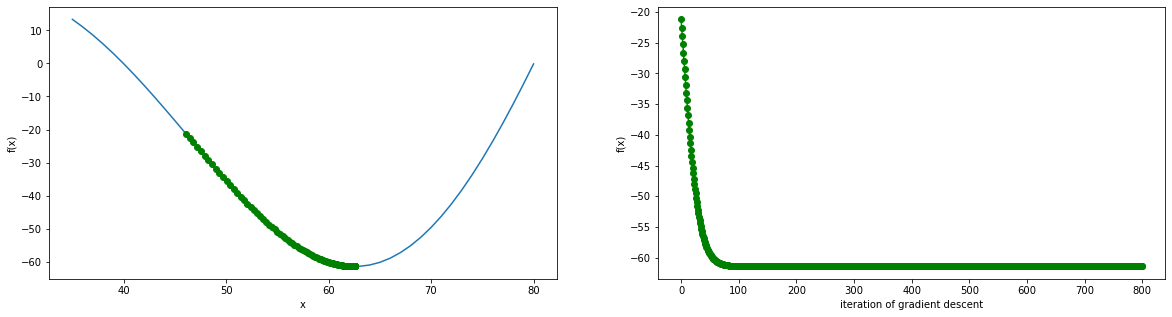

In [8]:
def plot_gradient_descent1D(func, x_range, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    axs[0].plot(x_range, func(x_range))
    axs[0].plot(results, func(results), 'og-')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x)')

plot_gradient_descent1D(f1, f1_range, results)

now lets try different values for the learning rate and see the results.

gradient descent found -58.15160299070934 as the minimum of the function on point [58.46114568]


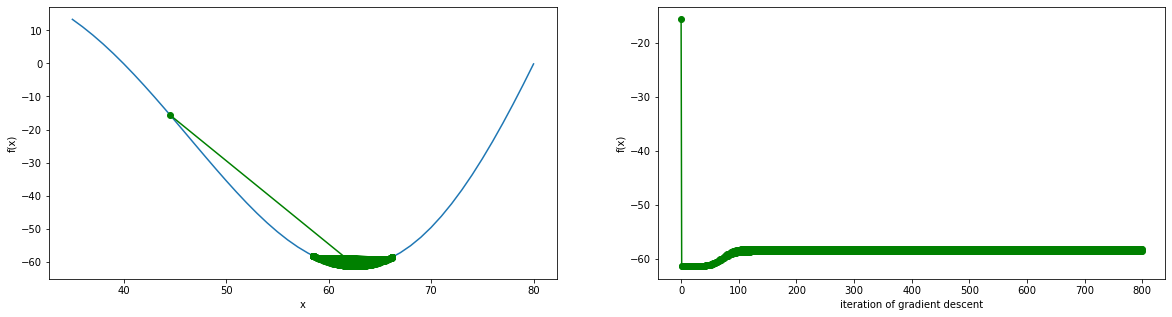

In [9]:
# learning rate = 5
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=5)
plot_gradient_descent1D(f1, f1_range, results)

gradient descent found -45.58931907928108 as the minimum of the function on point [71.18299709]


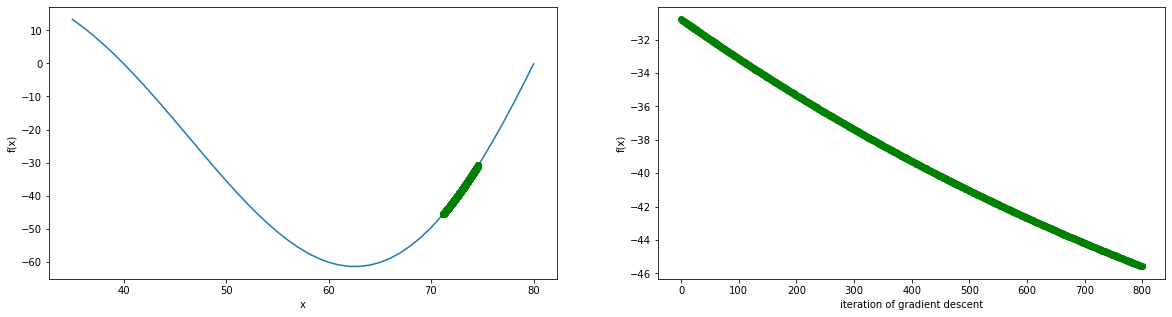

In [10]:
# learning rate = 0.001
results = gradient_descent(f1, np.random.uniform(35,80,1), learning_rate=0.001)
plot_gradient_descent1D(f1, f1_range, results)

write your answer to this question on the next cell.   
what happened when we set the learning rate to 5?   
what happened when we set the learning rate to 0.001?   

<font color=red>
(4 points)    
<br/>
Q1 -  وقتی نرخ یادگیری زیاد است ممکن است اصلا همگرا نشود و ناهمگرا باشد.
مثلادر خروجی داده شده یک حالت بازتاب آینه مانند پیدا کرده و ممکن بود اصلا به جواب نرسد
یعنی شاید در ظاهر سرعت همگرایی بیشتر باشد ولی اولا ممکن است همگرا نشود ثانیا حتی اگر همگرا شود نیز همینطور
از مینیمم ممکن است به چپ و راست بپرد
<br/>
Q2 -  در این وضعیت روند نزدیک شدن به جواب بسیار کند است و ممکن است قبل از اینکه به جواب برسیم و در حالی که در 
حال نزدیک شدن با نرخ کم هستیم ایتریت تمام شود
یعنی وقتی نرخ کم است سرعت همگرایی کم است ولی احتمالا قرار نیست مثل قبلی شود که از مینیمم بپرد
</font>

Now let try to run gradient descent on the third function and see what happens. be sure to run the next cell multiple times to see how the random initial point will impact the final result.

gradient descent found -519.2282582357554 as the minimum of the function on point [520.09133772]


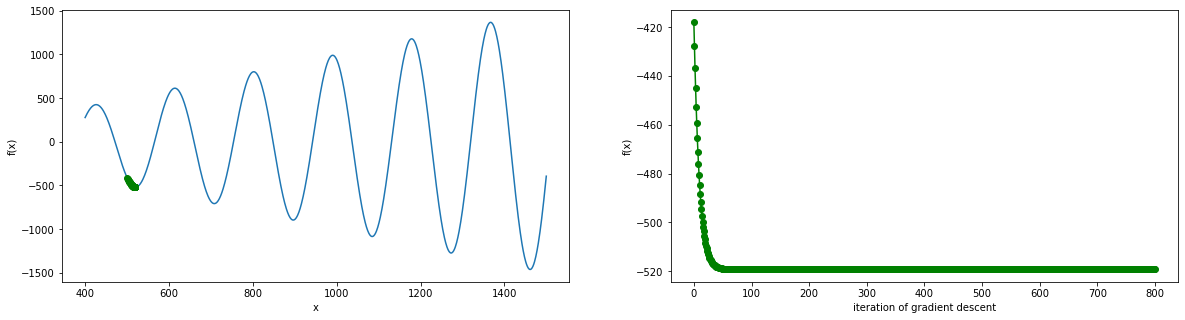

In [11]:
results = gradient_descent(f3, np.random.uniform(500,1000,1), learning_rate=0.1)
plot_gradient_descent1D(f3, f3_range, results)

# 3-implement gradient descent for two-dimensional functions

In this part you will implement gradient descent for a two dimensional function. the function we are going to use is as follows:

$f(x_1,x_2) = -\exp(-\frac{x_1^2+x_2^2}{2}) \quad $ where $\quad x_1,x_2 \in [-2, 2]*[-2, 2]$

implement the needed functions in the next cell.

In [12]:

def gradient_descent_1D_for_2D(func, initial_point, learning_rate=0.1, num_iter=800):
    
    num_variables = 1
    results = np.zeros((num_iter+1, num_variables))
    iteration = 0
    x = initial_point
    results[0] = x
    
    while iteration < num_iter:
        h = 0.0001 #?
        f_prime = (func(x+h) - func(x-h)) / (2 * h)
        diff = learning_rate * (f_prime)
        x = x - diff
        results[iteration + 1] = x
        iteration += 1
    
    return results

In [31]:
# 4 points

def f(x1, x2):
    return -1 * np.e  ** ((- x1 ** 2 - x2 ** 2)/2)

def gradient_descent_2d(func, initial_point, learning_rate=0.1, num_iter=50):
    '''
    Inputs:
    - func          : 2D function that we want to run gradient descent on. with type python function
    - initial_point : numpy array containing the initial points of the variable, of shape (2,)
    - learning_rate : gradient descent learning parameter
    - num_iter      : number of iterations to run gradient descent
    
    Outputs:
    - results       : numpy array containing points at each time step, of shape (num_iter+1, 2)
    '''
    def func1(x):
        return func(initial_point[0], x)
    def func2(x):
        return func(x, initial_point[1])    
    first = gradient_descent_1D_for_2D(func1, initial_point[0], learning_rate, num_iter)
    second = gradient_descent_1D_for_2D(func2, initial_point[1], learning_rate, num_iter)
    xx = np.reshape(np.dstack((first, second)), (num_iter + 1, 2))
    print(f'gradient descent found {func(xx[-1][0], xx[-1][1])} as the minimum of the function on point {xx[-1]}')
    return xx


In [33]:
results = gradient_descent_2d(f, np.random.uniform(-2,2,2))

gradient descent found -0.9992233267167355 as the minimum of the function on point [-0.03555025 -0.0170332 ]


we will visualize this 2d function using contours plot.

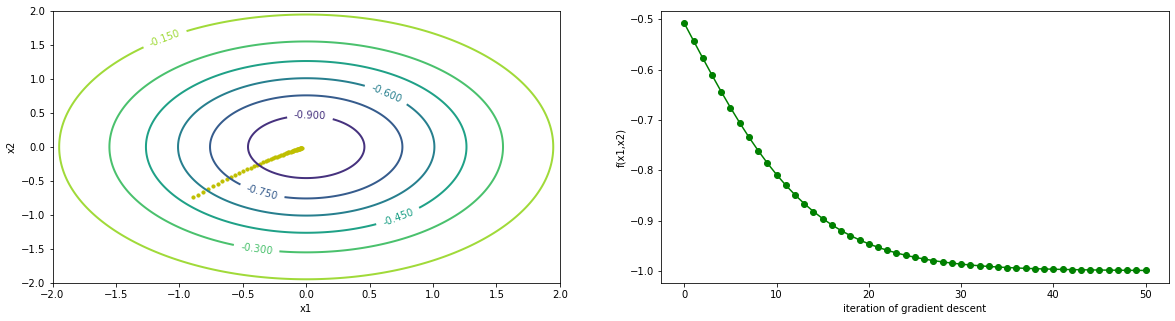

In [34]:
def contour_plot(func, results):
    fig, axs = plt.subplots(1,2,figsize=(20, 5))
    # see x through each step of gradient descent
    x1, x2 = np.meshgrid(np.linspace(-2.0, 2, 200), np.linspace(-2, 2, 200))
    y = func(x1, x2)
    cp = axs[0].contour(x1, x2, y, linewidths=2)
    axs[0].clabel(cp, inline=1, fontsize=10)
    axs[0].scatter(results[:,0], results[:,1], s=10, c="y")
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    # see y though each step of gradient descent
    axs[1].plot(np.arange(0, len(results)), func(results[:,0],results[:,1]), 'og-')
    axs[1].set_xlabel('iteration of gradient descent')
    axs[1].set_ylabel('f(x1,x2)')
    
contour_plot(f, results)